# <center>AI Project - Melbourne Housing Dataset</center>

**Yahya Nashat Jad 0222840**

**Ward halim muhsen 0222057**


The data can be accesed from: https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

This project analyzes Melbourne's real estate market using machine learning to predict housing prices based on property features. The dataset contains 13,581 instance with 21 attributes including location, land size, room counts, and property type.

**Acknowledgements**  

This is intended as a static (unchanging) snapshot of https://www.kaggle.com/anthonypino/melbourne-housing-market. It was created in September 2017. Additionally, homes with no Price have been removed.

# <center>Data Visualization</center>

In [67]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

In [68]:
data=pd.read_csv('melb_data.csv')

In [69]:
#visualizing columns and their types and number of instances
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [70]:
# data numeric measures
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [71]:
# categorical data measures
data.describe(include=[np.object_])

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,5 Charles St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


In [72]:
# check for missing data
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

BuildingArea and YearBuilt have too many missing values therefore they will be dropped

In [74]:
data.drop(['BuildingArea','YearBuilt'], axis=1,inplace = True )

In [75]:
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')
print(data['CouncilArea'].value_counts().head())
print("\n\n--------------------------------------------\n"
      , data['Car'].value_counts().head())
data['CouncilArea'].fillna('Moreland' , inplace=True)
data['Car'].fillna(2.0 , inplace=True)

data.isnull().sum()

CouncilArea
Moreland         1163
Boroondara       1160
Moonee Valley     997
Darebin           934
Glen Eira         848
Name: count, dtype: int64


--------------------------------------------
 Car
2.0    5591
1.0    5509
0.0    1026
3.0     748
4.0     506
Name: count, dtype: int64


Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

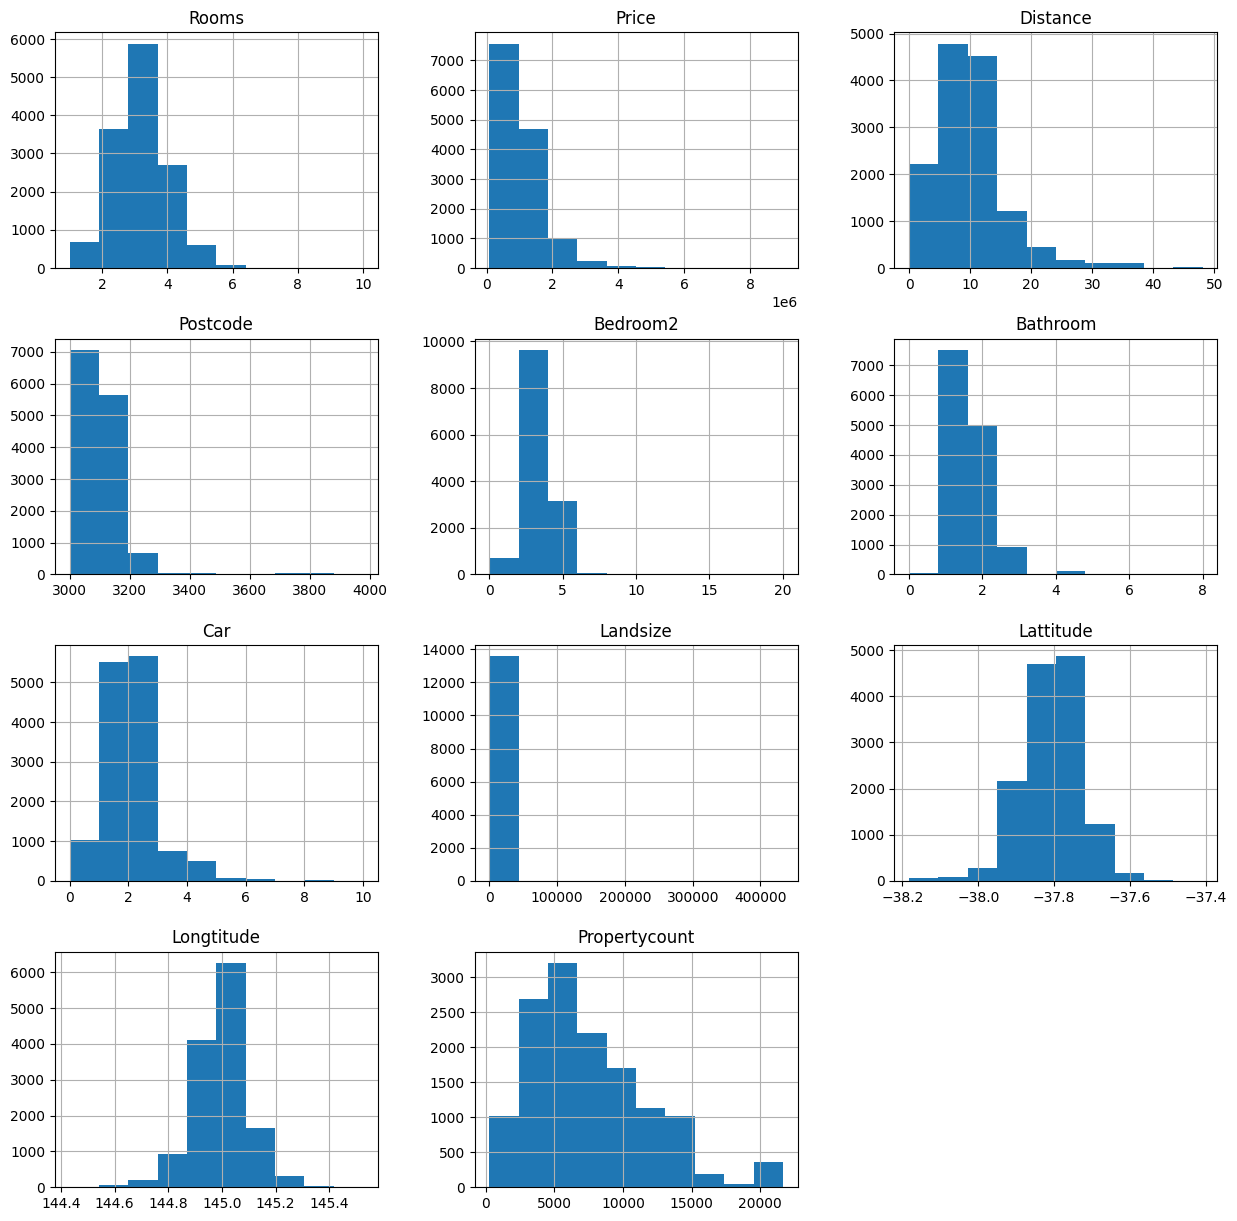

In [76]:
#looking at the features shape to see how the data is distributed in each feature
fig=data.hist(figsize=(15,15))

# <center>Looking For Correlations</center>

In [78]:
numeric_data = data.select_dtypes(include=['number'])
corr_matrix = data.select_dtypes(include=['number']).corr()
corr_matrix['Price'].sort_values(ascending=False)

Price            1.000000
Rooms            0.496634
Bedroom2         0.475951
Bathroom         0.467038
Car              0.239109
Longtitude       0.203656
Postcode         0.107867
Landsize         0.037507
Propertycount   -0.042153
Distance        -0.162522
Lattitude       -0.212934
Name: Price, dtype: float64

Rooms and Bedroom2 and Bathroom and Propertycount have good correlation with the price but we will look for better

In [80]:
#feature engineering
numeric_data['Big_Landsize'] = (numeric_data['Landsize'] > 150 ).astype(int)
numeric_data['Price_perRoom'] = (numeric_data['Price'] / numeric_data['Rooms']).where(numeric_data['Rooms'] > 0, numeric_data['Price'])
data['Big_Landsize'] = (data['Landsize'] > 150).astype(int)
data['Price_perRoom'] = (data['Price'] / data['Rooms']).where(data['Rooms'] > 0, data['Price'])
corr_matrix = numeric_data.corr()
corr_matrix['Price'].sort_values(ascending=False)


Price            1.000000
Price_perRoom    0.772426
Rooms            0.496634
Bedroom2         0.475951
Bathroom         0.467038
Big_Landsize     0.291414
Car              0.239109
Longtitude       0.203656
Postcode         0.107867
Landsize         0.037507
Propertycount   -0.042153
Distance        -0.162522
Lattitude       -0.212934
Name: Price, dtype: float64

As we can see from the above correlation values, we found a high correlation between the new features and the 'Price' feature specially the 'Price_perRoom' feature.

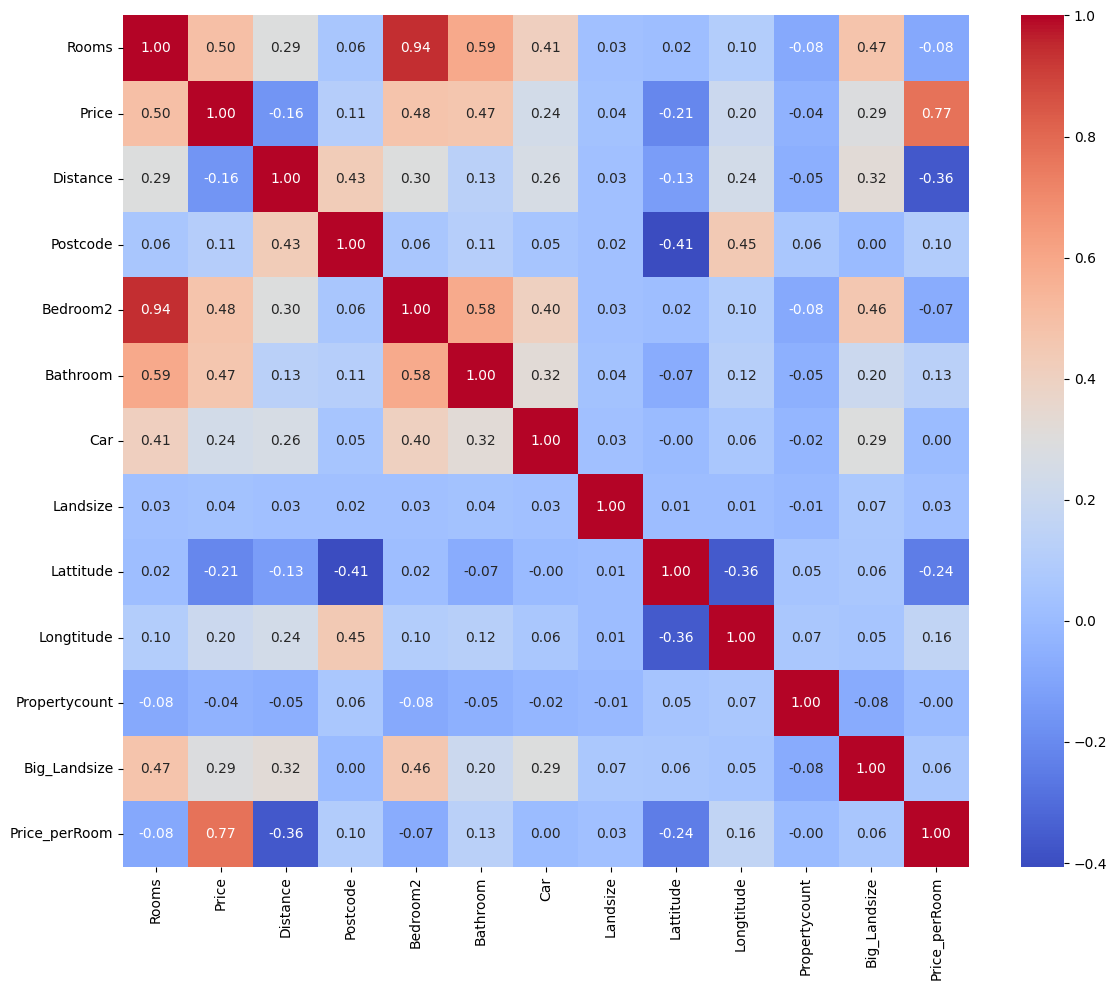

In [82]:
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.tight_layout()
plt.show()

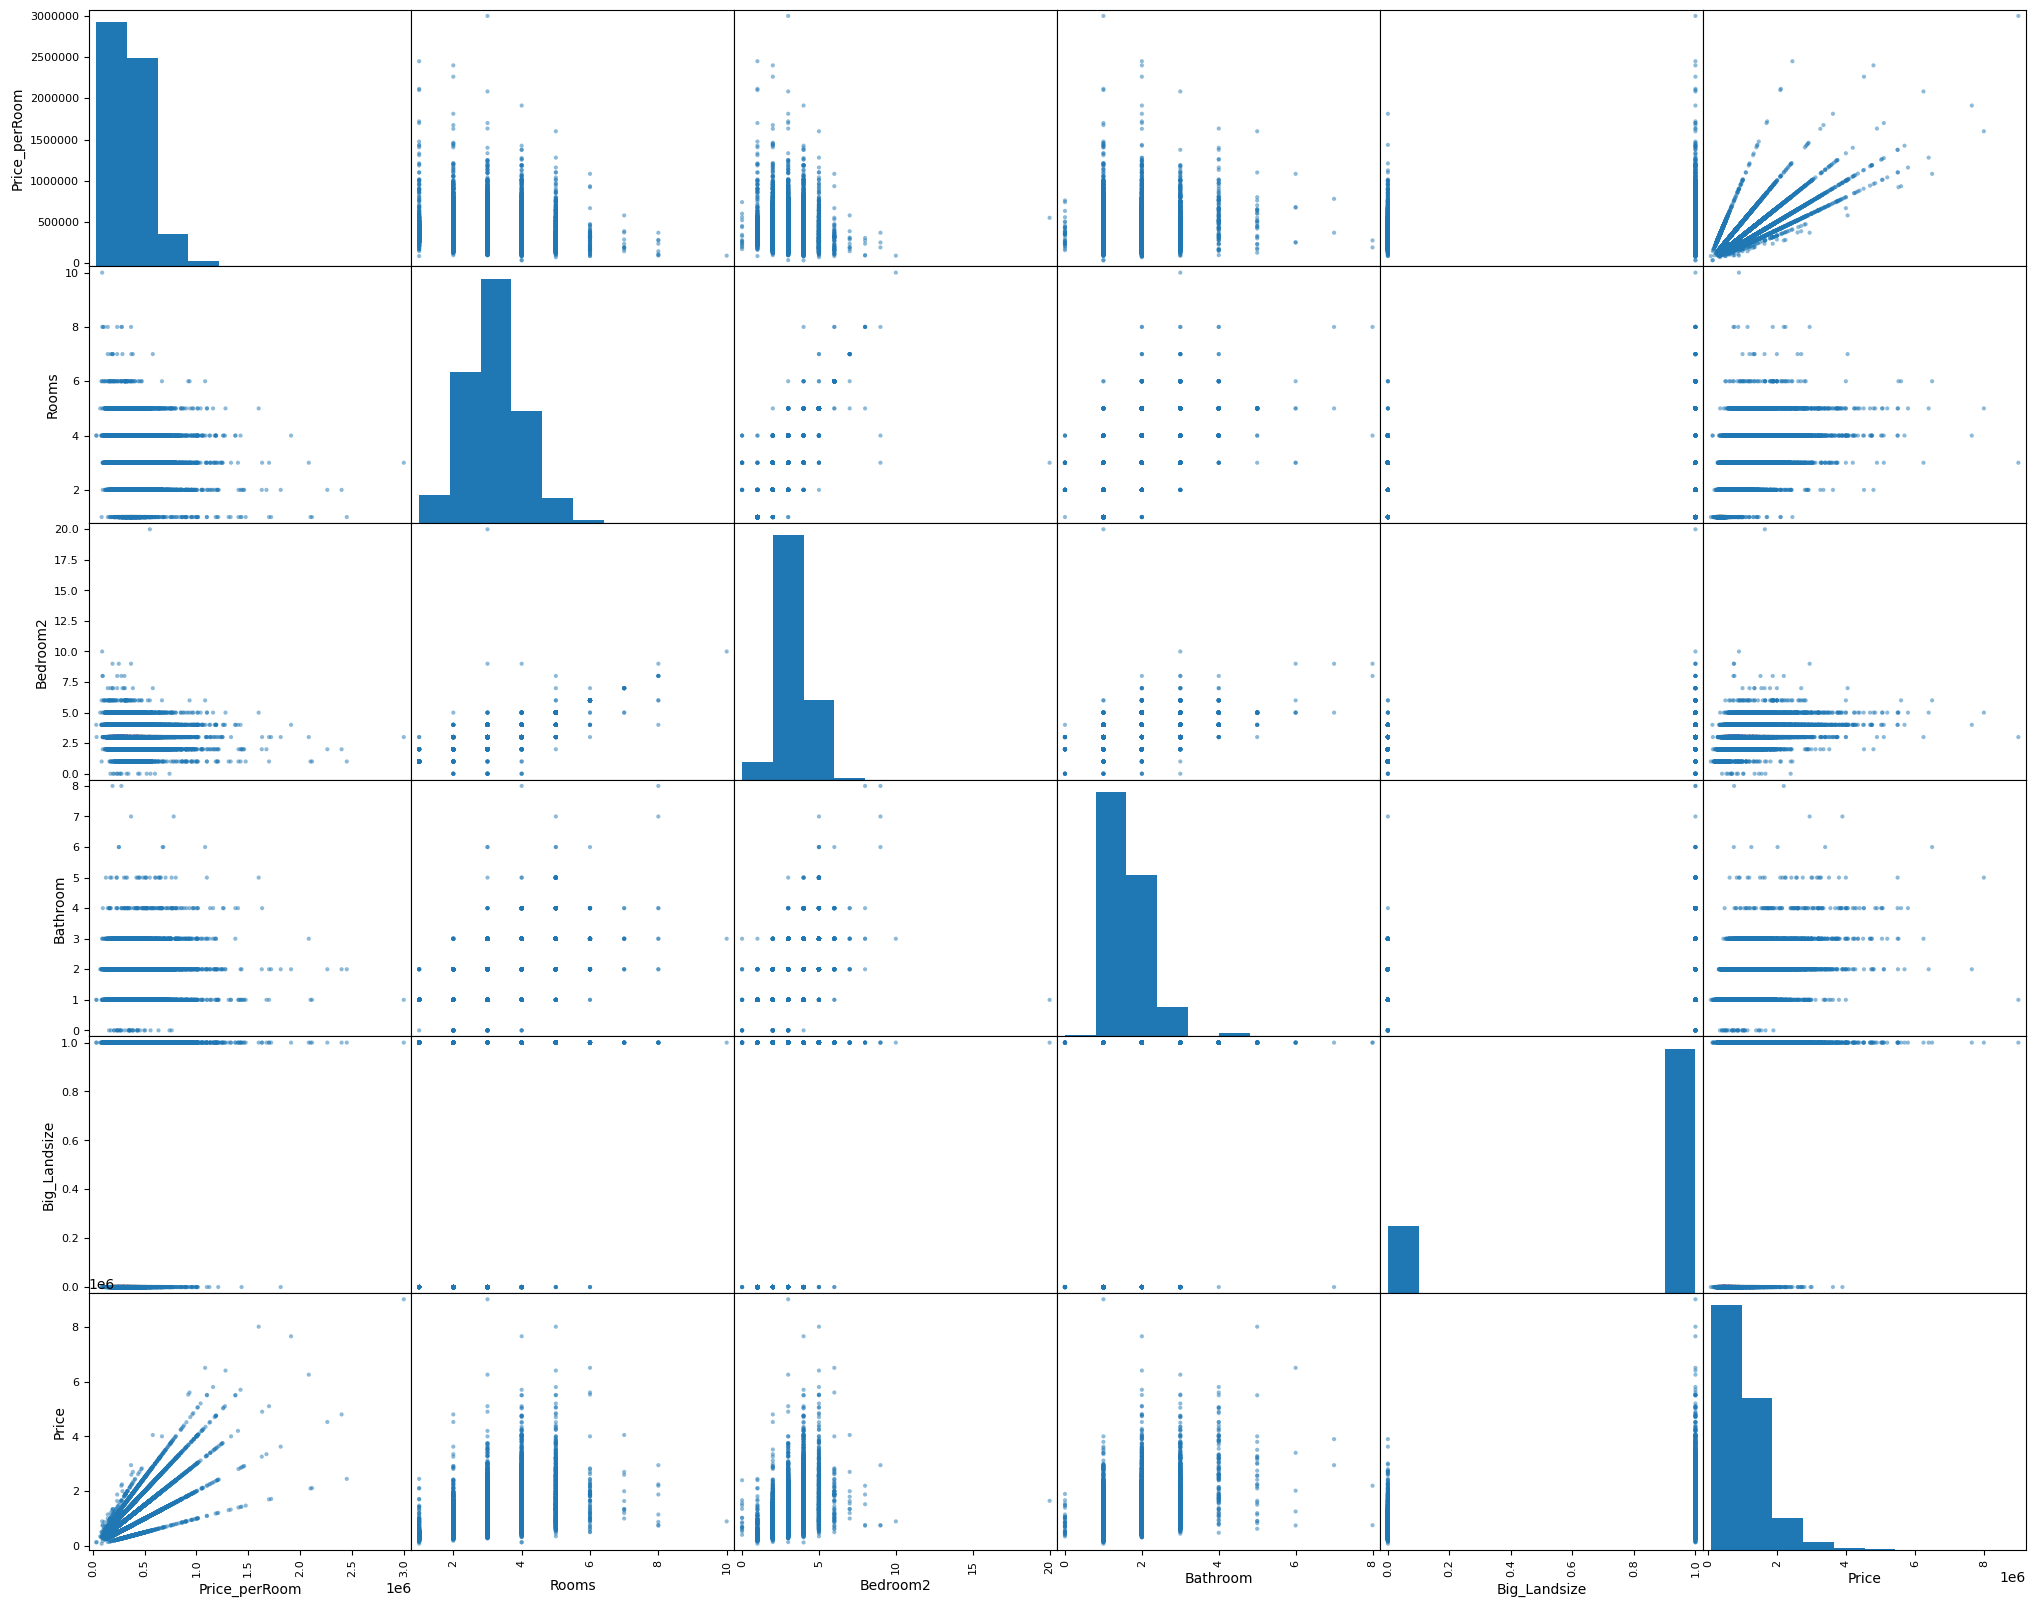

In [83]:
#this is a plot to see how the features correlate
from pandas.plotting import scatter_matrix
      
features = ["Price_perRoom", "Rooms", "Bedroom2", "Bathroom","Big_Landsize" ,"Price"] 
scatter_matrix(data[features], figsize=(25, 20))
plt.show()

In [84]:
X = data.drop("Price",axis=1)
y = data['Price'].copy()

# <center>Full pipeline</center>

In [86]:
num_attribs= list(numeric_data.drop("Price",axis=1).columns)
cat_attribs= list(data.select_dtypes(include=[np.object_]).columns)

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([   
    ('Numerical'         ,StandardScaler()       , num_attribs),
    ('Categorical'             ,OrdinalEncoder()    , cat_attribs),
]) 

In [88]:
from sklearn.model_selection import train_test_split
#preparing the data to be used in training the models

data_prepared = full_pipeline.fit_transform(X)
X_trainfull, X_test, y_trainfull, y_test = train_test_split(data_prepared, y, test_size=0.2, random_state=42)

# <center>Training models using sklearn to compare them later with the Neural networks model using Keras</center>


In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import *
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

model_names = [
    "K Nearest Neighbors",
    "Random Forest",
    "SVR",
    "Linear regression",
    "Decision Tree",
    "Ada boost Decision tree",
]

regressers = [
    KNeighborsRegressor(p=2 , weights='distance',n_neighbors=5),
    RandomForestRegressor(n_jobs=-1, random_state=42,n_estimators=200,max_depth=15,min_samples_split=4,min_samples_leaf=2),
    SVR(kernel='rbf',C=100,epsilon=0.1,gamma='scale'),
    LinearRegression(n_jobs=-1),
    DecisionTreeRegressor(max_depth=10, min_samples_split=4,min_samples_leaf=2,random_state=42),
    AdaBoostRegressor(DecisionTreeRegressor(max_depth=4,min_samples_leaf=3,random_state=42) , n_estimators=100,learning_rate=0.5,random_state=42)
]
result = ""
dict = {}
for model,name in zip(regressers,model_names):
    model.fit(X_trainfull , y_trainfull)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
#r2 score is a performance metric that is close of the accuracy, the more you get closer to one the model is better
    r2 = r2_score(y_test, y_pred)
    dict[name] = {'rmse' : rmse , 'r2_score' : r2}
    
    result += f"{name}:\n"
    result += f"  RMSE: {rmse:.4f}\n"
    result += f"  R2 Score: {r2:.4f}\n\n"

print(result)

K Nearest Neighbors:
  RMSE: 616867.0732
  R2 Score: 0.0420

Random Forest:
  RMSE: 39461.3874
  R2 Score: 0.9961

SVR:
  RMSE: 653063.0216
  R2 Score: -0.0737

Linear regression:
  RMSE: 181885.5908
  R2 Score: 0.9167

Decision Tree:
  RMSE: 37638.8108
  R2 Score: 0.9964

Ada boost Decision tree:
  RMSE: 153431.4651
  R2 Score: 0.9407




This loop trains each model in the regressers list and shows their RMSE and R2 Score, and from what we see above, the best RMSE we got is 37638.8 from the Decision Tree Regresser which is excelent for the price ranges we have and a R2 Score of 0.9964 which is also considered very good

# <center>Neural Network using Keras</center>

In [93]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

X_train, X_valid, y_train, y_valid = train_test_split(X_trainfull, y_trainfull, test_size=0.1, random_state=42)

norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
neural = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(40, activation="relu"),
    tf.keras.layers.Dense(40, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(1)
])

neural.summary()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

neural.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

early_stop = EarlyStopping(monitor='loss' , patience=8, restore_best_weights=True)

history = neural.fit(X_train, y_train,epochs=200, validation_data=(X_valid, y_valid), callbacks=[early_stop])

#mse_test, rmse_test = neural.evaluate(X_test, y_test)
y_pred_neural = neural.predict(X_test).flatten()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization)      │ (None, 20)                  │              41 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 40)                  │             840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 40)                  │           1,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,782 (14.78 KB)

 Trainable params: 3,741 (14.61 KB)

 Non-trainable params: 41 (168.00 B)

Epoch 1/200
306/306 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 963604.6250 - loss: 976334028800.0000 - val_RootMeanSquaredError: 208812.9531 - val_loss: 43602849792.0000
Epoch 2/200
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 196359.6406 - loss: 38639693824.0000 - val_RootMeanSquaredError: 185679.9688 - val_loss: 34477051904.0000
Epoch 3/200
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 178167.1719 - loss: 31816962048.0000 - val_RootMeanSquaredError: 177932.0000 - val_loss: 31659798528.0000
Epoch 4/200
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 183717.7969 - loss: 34064617472.0000 - val_RootMeanSquaredError: 164822.7500 - val_loss: 27166539776.0000
Epoch 5/200
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 158205.1406 - loss: 25198088192.0000 - val_RootMeanSquaredError: 161400.7344 - val_loss: 26050199552.0000
Epoch 6/200
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 156266.

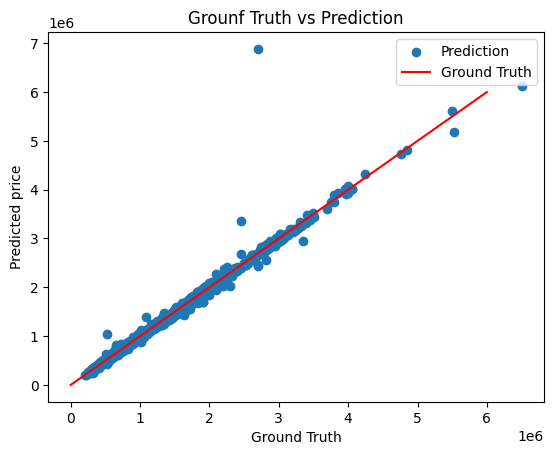

In [94]:
from sklearn.metrics import *

MSE=mean_squared_error(y_test,y_pred_neural)
RMSE = np.sqrt(MSE)
R2=r2_score(y_test,y_pred_neural)

dict ['Neural Networks'] = {'rmse' : round(RMSE , 1) , 'r2_score' : R2}

plt.scatter(y_test,y_pred_neural)
plt.plot([0,6000000],[0,6000000],c='r')
plt.xlabel('Ground Truth')
plt.ylabel('Predicted price')
plt.title('Grounf Truth vs Prediction')
plt.legend(['Prediction','Ground Truth'])

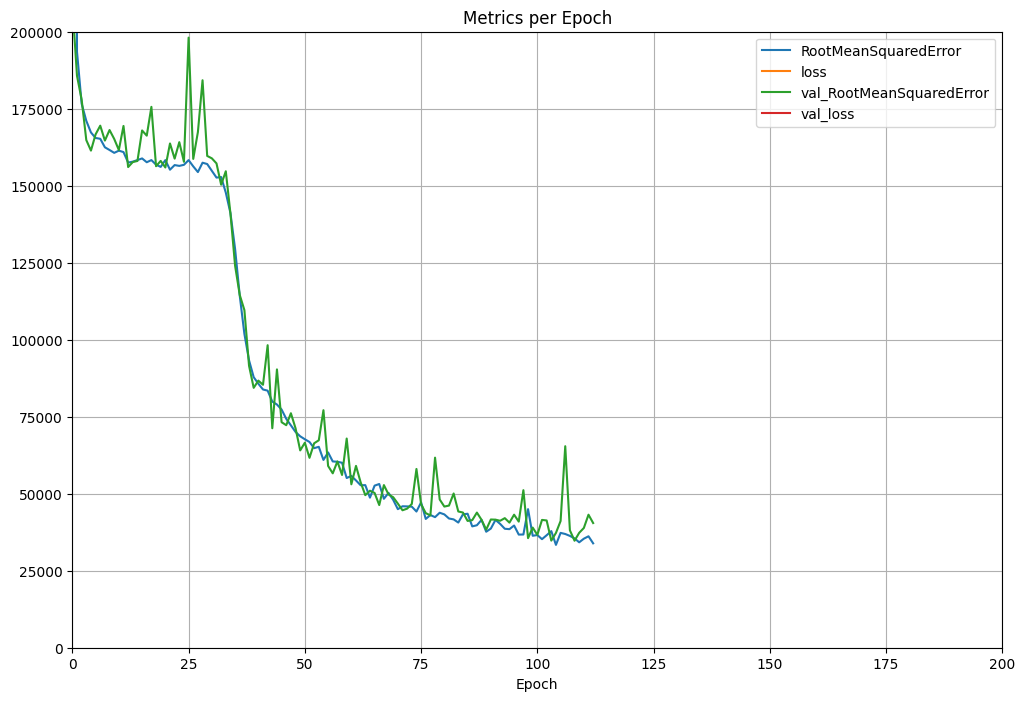

In [126]:
pd.DataFrame(history.history).plot(
    figsize=(12, 8),xlim=[0, 200], ylim= [0,2e5],grid=True, xlabel="Epoch")
plt.legend(loc="upper right")  # extra code
plt.title('Metrics per Epoch')
plt.show()

# <center>Comparing the Metrics of the Regressers with the Neural Networks</center>

In [97]:
    result += f"Neural Networks:\n"
    result += f"  RMSE: {RMSE:.4f}\n"
    result += f"  R2 Score: {R2:.4f}\n\n"

print(result)

K Nearest Neighbors:
  RMSE: 616867.0732
  R2 Score: 0.0420

Random Forest:
  RMSE: 39461.3874
  R2 Score: 0.9961

SVR:
  RMSE: 653063.0216
  R2 Score: -0.0737

Linear regression:
  RMSE: 181885.5908
  R2 Score: 0.9167

Decision Tree:
  RMSE: 37638.8108
  R2 Score: 0.9964

Ada boost Decision tree:
  RMSE: 153431.4651
  R2 Score: 0.9407

Neural Networks:
  RMSE: 89881.5069
  R2 Score: 0.9797




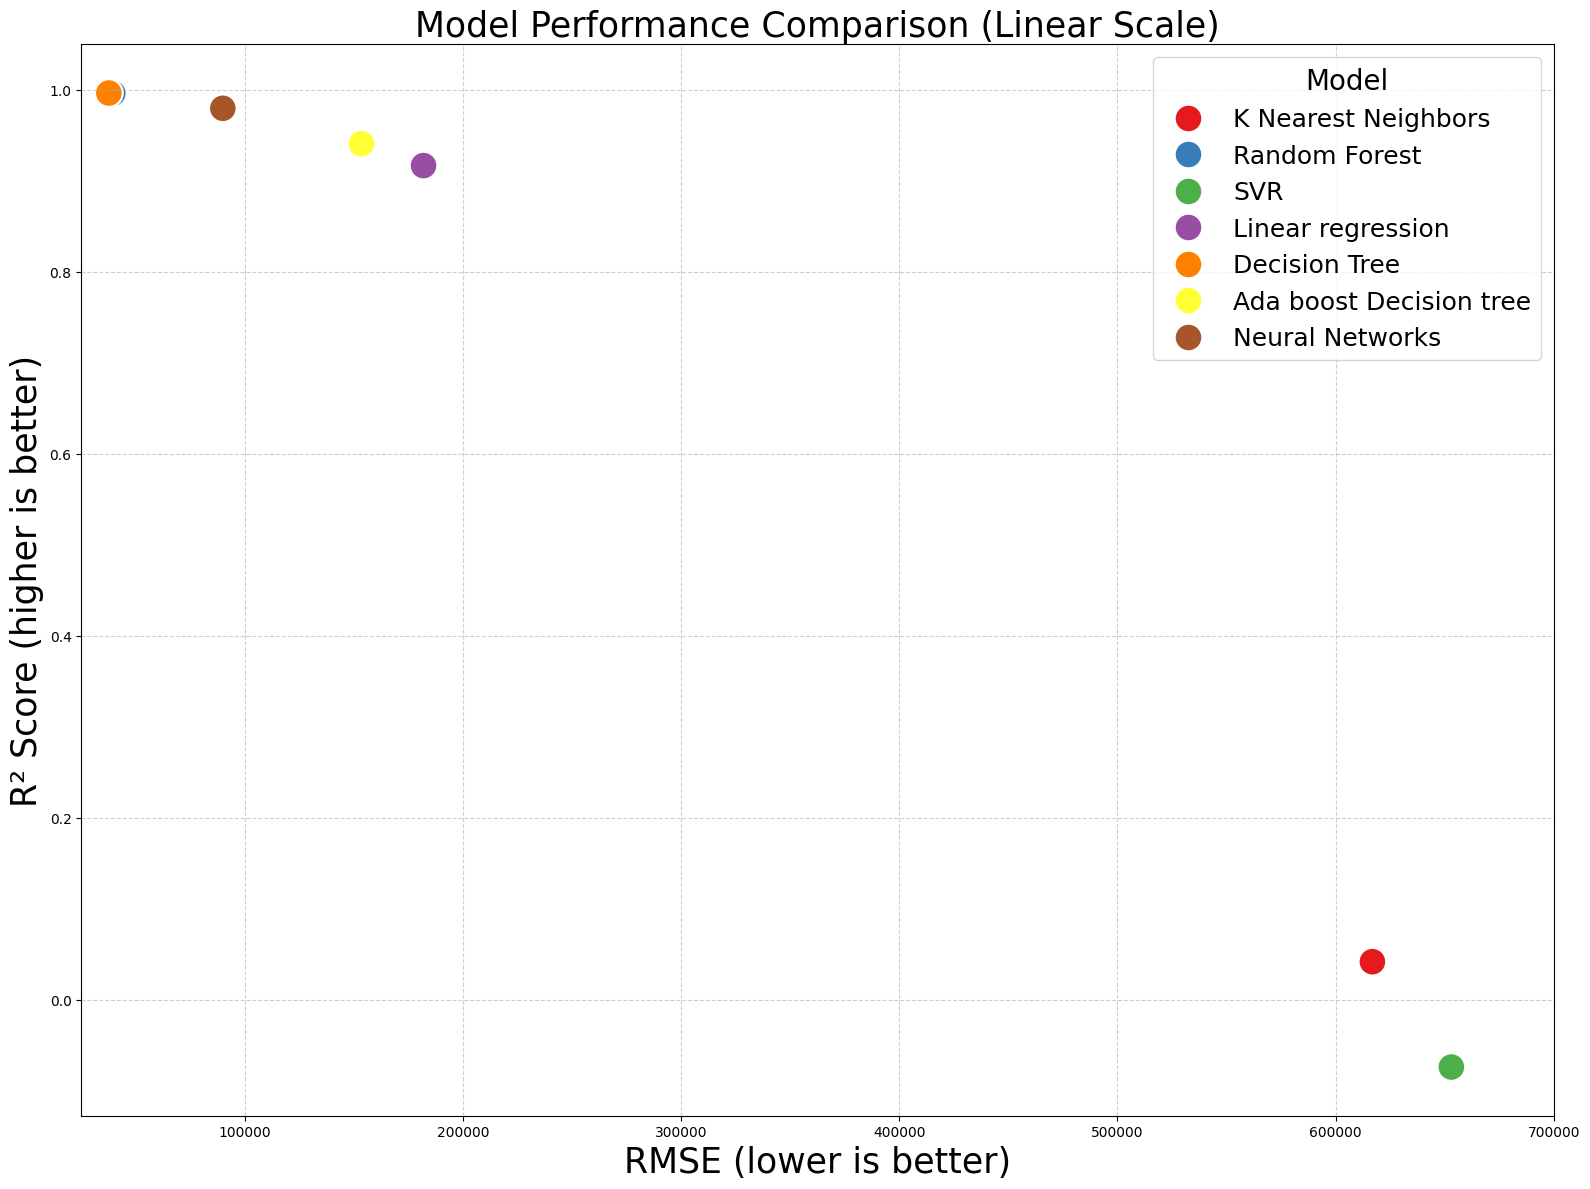

In [120]:
import seaborn as sns

model_data = pd.DataFrame(dict).T
model_data["Model"] = model_data.index

palette = sns.color_palette("Set1", n_colors=len(model_data))
plt.figure(figsize=(16, 12))
sns.scatterplot(data=model_data, x="rmse", y="r2_score", hue="Model", s=400, palette=palette)
plt.xlim(25000, 700000)
plt.xlabel("RMSE (lower is better)", fontsize=25)
plt.ylabel("R² Score (higher is better)", fontsize=25)
plt.title("Model Performance Comparison (Linear Scale)", fontsize=25)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Model", loc="best", fontsize=18, title_fontsize=20)
plt.tight_layout()
plt.show()


After running all the models on the same dataset, We conclude that for this DATASET not only **Neural Networks** gives excelent results, Other regressers such as **Decision Tree** also gives very good results as good as Neural Networks if not better.



# <center>The End of the Project</center>